In [44]:
#RSI Indicator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [45]:
#Uploading the data
nifty=pd.read_csv('nifty.csv',index_col='Date',parse_dates=True)
nifty=nifty.tail(100)

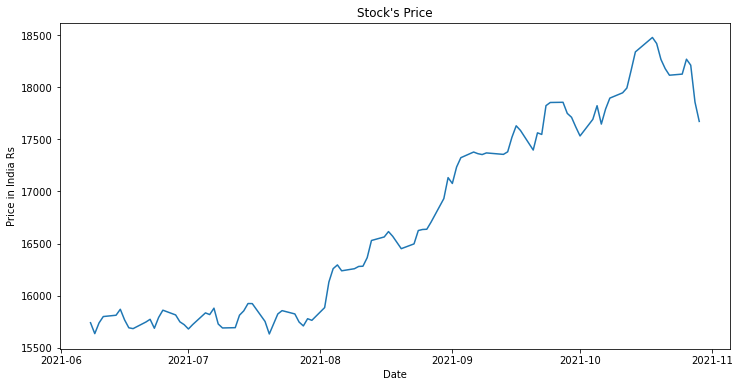

In [46]:
#Visualizing the data
plt.figure(figsize=(12,6))
plt.title("Stock's Price")
plt.xlabel('Date')
plt.ylabel('Price in India Rs')
plt.plot(nifty['Close'])
plt.show()
        

In [47]:
#Create a Exponential Moving Average Indicator fuction
def EMA(data,period=20,column='Close'):
    return data[column].ewm(span=period,adjust=False).mean()


In [48]:
#Create a fuction to calculate the Stocahstic Relative Strength Index
def StochRSI(data,period=14,column='Close'):
    delta = data[column].diff(1)
    delta = delta.dropna()
    up=delta.copy()
    down=delta.copy()
    up[up<0]=0
    down[down>0]=0
    data['up']=up
    data['down']=down
    AVG_Gain=EMA(data,period,column='up')
    AVG_Loss=abs(EMA(data,period,column='down'))
    RS=AVG_Gain/AVG_Loss
    RSI=100.0-(100.0/(1.0+RS))
    
    stockrsi=(RSI-RSI.rolling(period).min())/(RSI.rolling(period).max()-RSI.rolling(period).min())
    return stockrsi

In [49]:
#Store the stochastic RSI dat in a new column
nifty['StochRSI']=StochRSI(nifty)


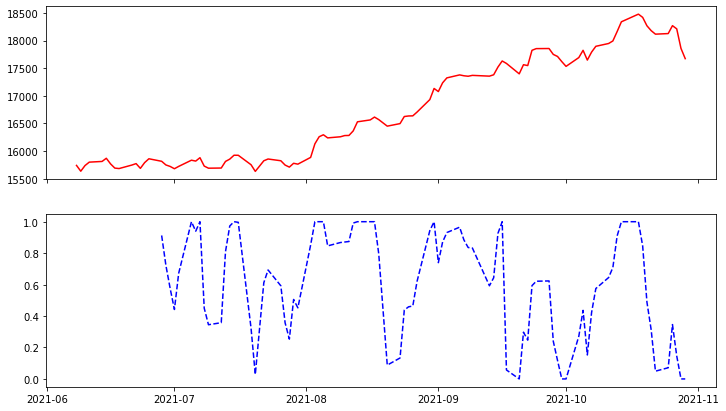

In [50]:
#plot the data
#create a figure and a set of subplot
fig,(ax1,ax2)=plt.subplots(nrows=2,sharex=True,figsize=(12,7))
#Plot the Close Price
ax1.plot(nifty.index,nifty['Close'],color='red')
ax2.plot(nifty.index,nifty['StochRSI'],color='b',linestyle='--')
